# Question-4

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Part-1

In [3]:
def neg_image(img,b):
    return (b -img).astype(np.uint8)

def BitQuantizeImage(im,k):
    b = 2**k -1
    out = im*(b/255)
    return out.astype(np.uint8)

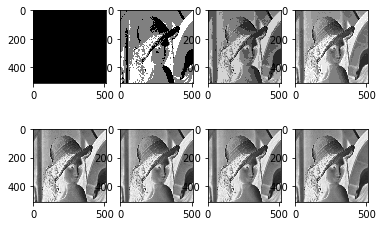

In [4]:
img = cv2.cvtColor(cv2.imread('./../input_data/lena.jpg'),cv2.COLOR_BGR2GRAY)

# out = np.zeros((img.shape[0],img.shape[1],))
fig = plt.figure()
fig.add_subplot(241)
for k in range(1,9):
    out = neg_image(BitQuantizeImage(img,k),2**k-1)
    if k !=1:
        plt.subplot(2,4,k)
    plt.imshow(out,'gray')
    
# out_rgb = cv2.cvtColor(out,cv2.COLOR_BGR2RGB)
plt.show()

# Part-2

In [5]:
def gamma_transform(img,r):
    return (np.power(img/255,r)*255).astype(np.uint8)


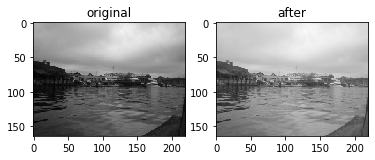

In [6]:
img = cv2.imread('./../input_data/gamma-corr.png')
out = gamma_transform(img,0.5)
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
out_rgb = cv2.cvtColor(out,cv2.COLOR_BGR2RGB)
fig = plt.figure()
fig.add_subplot(121)
plt.title('original')
plt.imshow(img_rgb) 
plt.subplot(1,2,2)
plt.title('after')
plt.imshow(out_rgb)
plt.show()

On increasing the gamma value the intensities in image decreases.
we are taking [0,1] range of intensities and then transofrming and the multiplying with **L-1**. 
In [0,1] x^r 's slope is < 1 when r > 1. This means the points lying below **Y=X**. So, lot of values get mapped to lower intensities.
In [0,1] x^r 's slope is > 1 when r < 1. This means the points lying above **Y=X**. So, lot of values get mapped to higher intensities.

So, on increasing r we see the image shifts towards lower intensities.

# Part-3

In [7]:
def range_finder(val,a,b):
    return np.argmax((a <= val) & (val <= b))

def piecewise_lt(img,k1,k2,a,b):
    out = np.zeros(img.shape)
    for i in range(0,img.shape[0]):
        for j in range(0,img.shape[1]):
            ind = range_finder(img[i,j]/255,a,b)
            
            out[i,j] = (k1[ind]*img[i,j] + k2[ind]*255)
            
    return out.astype(np.uint8)

In [8]:
img = cv2.cvtColor(cv2.imread('./../input_data/lena.jpg'), cv2.COLOR_BGR2GRAY)
k1 = np.array([(0,0), (4/3, 0), (-2, 2), (0, 0)])
a1 = np.array([(0, 0.3), (0.3, 0.6), (0.6, 0.8), (0.8, 1)])

out1 = piecewise_lt(img,k1[:,0],k1[:,1],a1[:,0],a1[:,1])

k2 = np.array([(0, 0), (0, 0.2), (0, 0.4), (0.4, 0.6), (0, 0.6) ])
a2 = np.array([(0, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, 1)])
out2 = piecewise_lt(img,k2[:,0],k2[:,1],a2[:,0],a2[:,1])


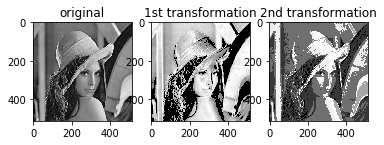

In [9]:
fig = plt.figure()
fig.add_subplot(131)
plt.title('original')
plt.imshow(img,'gray') 
plt.subplot(1,3,2)
plt.title('1st transformation')
plt.imshow(out1,'gray')
plt.subplot(1,3,3)
plt.title('2nd transformation')
plt.imshow(out2,'gray')
plt.show()